**SHREAY MITTAL**

**TASK 3** : Prediction using Decision Tree 
Algorithm

**Problem Statement** 

Create the Decision Tree classifier and visualize it graphically. 
The purpose is if we feed any new data to this classifier, it would be able to 
predict the right class accordingly. 


Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading The Data

In [3]:
data = pd.read_csv("/content/Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


Label Encoding

In [8]:
data['Species'] = data['Species'].astype('category')
data['Species'] = data['Species'].cat.codes
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


Data Visualization

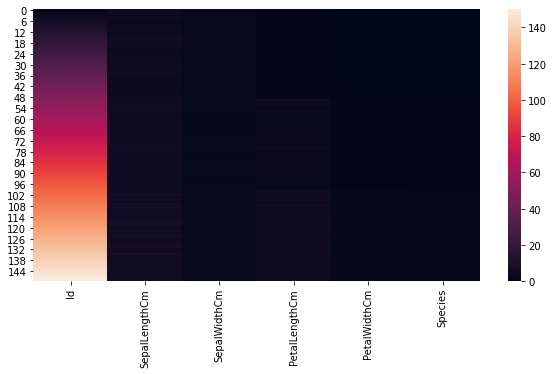

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(data)
plt.show()

In [14]:
x = data.iloc[: , 1:5]
y = data['Species']

Spliting and Training data

In [17]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 0)

Training The Model

In [18]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
y_predict = DTC.predict(x_test)
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0], dtype=int8)

Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test , y_predict)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

Accuracy

In [23]:
from sklearn import metrics
print(metrics.classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Decision Tree

[Text(223.2, 244.62, 'X[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(167.39999999999998, 190.26000000000002, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(279.0, 190.26000000000002, 'X[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(111.6, 135.9, 'X[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(55.8, 81.54000000000002, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(167.39999999999998, 81.54000000000002, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(111.6, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(223.2, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(446.4, 135.9, 'X[3] <= 1.75\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(390.59999999999997, 81.54000000000002, 'X[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(334.79999999999995, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),

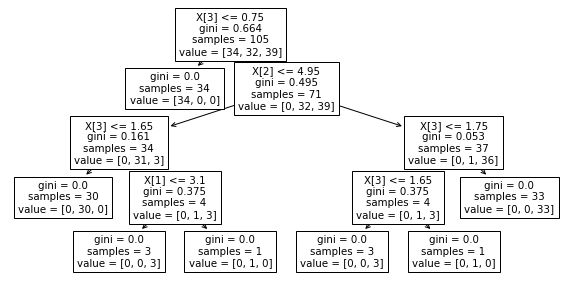

In [29]:
from sklearn import tree
fn = ['SepalLengthCm' , 'SepalWidthCm' ,  'PetalLengthCm' ,  'PetalWidthCm']
cn = ['Iris-setosa' , 'Iris-versicolor' , 'Iris-virginica']
fig, ax = plt.subplots(figsize=(10, 5))
tree.plot_tree(DTC)